test1 Enter....


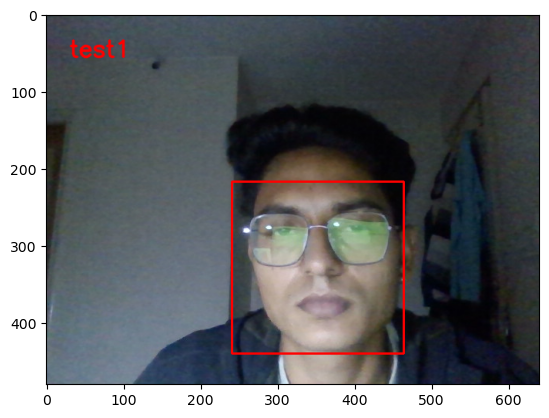

In [2]:


# Import the necessary packages
import cv2 as cv
import face_recognition
import matplotlib.pyplot as plt


# Load the known image 
known_image = face_recognition.load_image_file("test1.jpg")
known_faces = face_recognition.face_encodings(face_image = known_image,num_jitters=50,model='large')[0]

# Lanch the live camera
cam = cv.VideoCapture(0)
#Check camera
if not cam.isOpened():
	print("Camera not working")
	exit()
	
# when camera is opened
while True:
	
	# campture the image frame-by-frame
	ret, frame = cam.read()
	
	# check frame is reading or not
	if not ret:
		print("Can't receive the frame")
		break

	# Face detection in the frame
	face_locations = face_recognition.face_locations(frame)

	for face_location in face_locations:
		top, right, bottom, left = face_location
		# Draw a rectangle with blue line borders of thickness of 2 px
		frame = cv.rectangle(frame, (right,top), (left,bottom), color = (0,0, 255), thickness=2)
	# Check the each faces location in each frame
	try:
		# Frame encoding
		Live_face_encoding = face_recognition.face_encodings(face_image = frame,num_jitters=23,model='large')[0]

		# Match with the known faces
		results = face_recognition.compare_faces([known_faces], Live_face_encoding)

		if results:
			img = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
			img = cv.putText(img, 'test1', (30, 55), cv.FONT_HERSHEY_SIMPLEX, 1,(255,0,0), 2, cv.LINE_AA)
			print('test1 Enter....')
			plt.imshow(img)
			plt.show()
			break
	except:
		img = cv.putText(frame, 'Not test1', (30, 55), cv.FONT_HERSHEY_SIMPLEX, 1,(255,0,0), 2, cv.LINE_AA)
		# Display the resulting frame
		cv.imshow('frame', img)
		# End the streaming
		if cv.waitKey(1) == ord('q'):
			break
	

# Release the capture
cam.release()
cv.destroyAllWindows()
